# <center> EXPLORATION OF SALES AND FINANCE FOR THE FISCAL YEAR JANUARY, 2019 TO JANUARY, 2020 
# <center> By;

# <center> RICHARD DANQUAH
    
    
#<center> 31st January, 2020 

# <center> A REPORT PRESENTED TO THE FINANCIAL TEAM AND MARKETING MANAGEMENT ON SALES TRENDS AND SALES RETURNS FOR THE FISCAL YEAR’S FINANCIAL SALES STATEMENT. 











































































# 1 Introduction
This Report explores the possibility of using Python Programming as tools to automatically process data gathered from financial activities and extract relevant information to achieve the goals of the Marketing and Finance Team. The objective is to perform an automatic process of data using artificial intelligence techniques, in particular the application of machine learning algorithms. The final goal is to manage the extraction of quantitative data with relevant information to inform manager about the current competitiveness of our products and services. 


## <Left> 1.1 Staement Of the Report 
This report is intended to inform managment on the performance of the Marketing managers on how their marketing strategies were able to reach both loyal and impulse customers and improved Sales Value. This finance report will communicates the Firm's crucial financial information and competitiveness and covers a specified period through daily, weekly, and monthly financial reports. This will be our tools that you can apply to increase internal business performance as compared to privious years. The  data on the finance report is also an effective means of remaining updated with any significant progress and changes in the status of our finances and guid as to measure our financial results, cash flow, and financial position on Monetary terms.

# <Left> 1.2 Objectives Of The Report
    
    -- To Understand our current customer base in all States

    -- To understand our Financial Position on how much Sales was declared 

    -- To Understand Buying trends base on Location and Day of The Week

    -- To understand with of the Month or Day of the Week is suitable for promotion

    -- To understand how many items were sold through out various Days of the Week and Months.

    -- To understand most items sold and how much sales was made from each item sold in the Fiscal year. 


#<center> 

In [3]:
%%html
from IPython.core.display import display, HTML
from IPython.display import display
from IPython.display import IFrame

In [4]:
%%html
%%javascript 
IPython.notebook.save_notebook()

## 2.0 Data Preprocessing 

###### Importing Important Python Libraries

In [5]:
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing 
%matplotlib inline

In [6]:
import plotly.graph_objects as go
from kaleido.scopes.plotly import PlotlyScope
import plotly.graph_objects as go
#import orca
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from datetime import datetime, date
today_date = date.today()
import pandas as pd 
import os 

In [7]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Loading Data Into Pandas DataFrame

In [8]:
### Now We read from Updated Data 
stockData1 = pd.read_csv("stockclosedata2.csv", na_values = [" ?"])
stockData1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


We call our Data Frame to print out our data in our Database or in our repositry and print the first five (5) rows of our Data frame.

In [9]:
stockData1.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


We check in our data set if there are unusual entries in the data set, if there are any, python will automatically compute all our unusual entries and tell us which of our columns and rows contains these errors or entries. Where in the table indicates True means an error entry and where False means vice versa.

In [10]:
(stockData1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(3), object(3)
memory usage: 8.6+ MB



We use Our Pandas Library to process the data to give us information on our data set of which belongs to which data type in our Data Frame. From the table we can see our columns corresponds to various Data types in a Data Frame.

In [11]:
df_colus = (['OrderID','Product','QuantityOrdered','PriceEach','OrderDate','PurchaseAddress'])

We call a new Variable and redefine Our Colums respectively

In [12]:
stockData1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [13]:
stockData1.columns = df_colus
stockData1.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


We then Check our columns we priviously defined in our Data Columns to a structured column names and print out our first five row of our dataset. 

In [14]:
stockData2 = stockData1.dropna(how = 'any')
stockData2.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


After examine our data set and having a second look at the error entries, we then call our Python Pandas magic library to collate and remove all error entries in our dataset. From the table above We can see a sample of the Order ID, Product purchased, Quantity Ordered, Price of the product, the Order date of Purchase and Addresses of customer.

In [15]:
stockData2['OrderDate'].unique()

array(['4/19/2019 8:46', '4/7/2019 22:30', '4/12/2019 14:38', ...,
       '9/23/2019 7:39', '9/19/2019 17:30', '9/30/2019 0:18'],
      dtype=object)

Checking different time stamp entries in our Data

In [16]:
stockData2['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

We then Count how many time a product was bought by different customers in different times. This is not the actual total sum of Order quantity purchased by our customers. The dataFrame above shows that USB-C Charging Cable was purchased 21903 different times, followed by Lightning Charging Cable 21658, AAA Batteries (4-pack) 20641, AA Batteries (4-pack) 20577, Wired Headphones 18882 and as follow in order on the DataFrame. 

In [17]:
stockData2['QuantityOrdered'].value_counts()

1.0    168552
2.0     13324
3.0      2920
4.0       806
5.0       236
6.0        80
7.0        24
8.0         5
9.0         3
Name: QuantityOrdered, dtype: int64

The table above gives us a fair Idea of how many time or quantity of items bought. Number of quantity of items a customer, From our Data output we can
see that 168552 customers bough 1 items at a time, 13324 customers bought 2 items at a time, 2920 customers bought 3 items at the same time of purchase. 
Again, 806 customers boughr 4 items at a time, 236 customers also bought 5 items at a single time of purchase, 80 customers bought 6 items bought at the same time.Lastly, 24, customer, 5 customer and 3 customers also bought 7, 8, and 9 Items in a single time of purchasing respectivey. Statistically, We have a fair idea that,  Most of our customers are likely to buy 1 or 2 or 3 items at a time. This will give managers and decision makers to plan of packaging efficiency and optimize packaging cost. 

### Data Munging and Features Extraction

In [18]:
stockData2['QuantityOrdered'] = stockData2.QuantityOrdered.astype(int)

C:\Users\JeroRich\anaconda3\envs\ox\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
stockData2['OrderDate'] = pd.to_datetime(stockData2['OrderDate'])

In [20]:
stockData2['PriceEach'] = stockData2.PriceEach.astype(float)

In [21]:
stockData2['OrderID'] = stockData2.OrderID.astype(str)

In [22]:
stockData2['Product'] = stockData2.Product.astype(str)

In [23]:
stockData2['PurchaseAddress'] = stockData2.PurchaseAddress.astype(str)

We are converting all our our columns such as QuantityOrdered, PriceEach, OrderID, Product, PurchaseAddress to their respective Data type in Pyhton for further 
Analytics to be carried out. Lastly we use the TimeDate Stamp to convert our dates into proper Python date type.  

In [24]:
stockData2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   OrderID          185950 non-null  object        
 1   Product          185950 non-null  object        
 2   QuantityOrdered  185950 non-null  int32         
 3   PriceEach        185950 non-null  float64       
 4   OrderDate        185950 non-null  datetime64[ns]
 5   PurchaseAddress  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


In [25]:
stockData2.describe()

,QuantityOrdered,PriceEach
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


This our first descriptive Analysis in depth, In Data Analytics, one of the most important step is have astatistical idea of the numerical data types in Dataset. 
The Count of the summary of all data entries, Mean, that is the avarage score, Standard deviation, which is a deviation or how far apart a deviation in a dataset 
is from the total mean. The minimum value and the Maximum value in the dataset, the first quatile, the second quatile known as inter quatile and the thrid quatile. This is mostly visualized using the whisker box plot to check for skewness in our data set or for outliers. This is mostly and also important when drawing our normal distribution curve with the numerical values in a Data 

### Munging Date In Python

In [26]:
## We Want to Know at What Mounth is Sales High In Our shop
## We Need to Add a Mounth Colum to our Original Coloumns 
## And Now We Separate a new column for Month alone 

stockData2["Month"] = stockData2['OrderDate'].dt.strftime('%m')

C:\Users\JeroRich\anaconda3\envs\ox\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Munging Sales Feature From Price and Quantity

In [27]:
## We Want to Know at What Mounth is Sales High In Our shop
## We Need to Add a Mounth Colum to our Original Coloumns
## At This stage we are adding th sales Column to know which Mounth in our Data hasve hiher sales volume 
stockData2["Sales"]  = stockData2["QuantityOrdered"] * stockData2["PriceEach"]
stockData2.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,Month,Sales
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99


We call upon a Magic Pandas library in Python to extract the month from the actual Date and create a new column call "Month", Lastly, we again use similar process 
to extract our total sales per day from our dataset. This process is one of the most significant steps in this Analysis since the Data we extracted from the 
Database did not contain out total sales made in a day, but we are confident and with competency in Python that we can in any way computed our total sales and 
further create a corresponding  column to hold our total sales column in  our dataset.

In [28]:
stockData2['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: Month, dtype: int64

We count the Number of Items sold in each month from Jenuary to December. 

### Extracting With Lamda, City From Purchase Address

In [29]:
def get_city(address):
    return address.split(",")[1]
def get_state(address):
     return address.split(",")[2].split(" ")[1]
    
stockData2["City"] =  stockData2["PurchaseAddress"].apply(lambda x: get_city(x) + '(' + get_state(x) + ')')
stockData2

C:\Users\JeroRich\anaconda3\envs\ox\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,Month,Sales,City
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA)
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles(CA)
186846,259354.0,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco(CA)
186847,259355.0,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco(CA)
186848,259356.0,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco(CA)


We call upon a Magic Pandas library in Python to extract the Various Cities from the actual Purchasing Addresses and create a new column call "City", Lastly,
we again use similar process is aslo another significant steps in this Analysis since the Data we extracted from the Database did not contain Cities but rather 
Addresses, but we are again confident and with competency in Python that we can extract our individual Cities Name and abbriviation from the Purchase Address to
create a corresponding  column to hold our individual Cities in our DataFrame. 

In [30]:
stockData3 = pd.read_csv("stockAnalysis.csv", na_values = [" ?"])
stockData3.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,Month,Sales,City
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
1,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
2,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
3,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
4,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


#### Converting Strings, Floats and Integers 

In [31]:
stockData3['OrderID'] = stockData3.OrderID.astype(str)

In [32]:
stockData3['Product'] = stockData3.Product.astype(str)

In [33]:
stockData3['QuantityOrdered'] = stockData3.QuantityOrdered.astype(int)

In [34]:
stockData3['PriceEach'] = stockData3.PriceEach.astype(float)

In [35]:
stockData3['OrderDate'] = pd.to_datetime(stockData3['OrderDate'])

In [36]:
stockData3['PurchaseAddress'] = stockData3.PurchaseAddress.astype(str)

In [37]:
stockData3['Month'] = stockData3.Month.astype(str)

In [38]:
stockData3['Sales'] = stockData3.Sales.astype(float)

In [39]:
stockData3['City'] = stockData3.City.astype(str)

From the above codes, since we have created a new Columns into our Dataset, We need to convert all columns in their respective data type. 

#### Munging Days From Dates With Pandas Series

In [40]:
## Extracting The Days Of the week from the Date
stockData3["Daysinweek"] = pd.Series(stockData3['OrderDate'].dt.day_name())
stockData3.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,Month,Sales,City,Daysinweek
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),Friday
1,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),Sunday
2,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),Friday
3,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),Friday
4,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),Tuesday


We use our Magic Pandas library in Python to extract the Days of the Week from the Date stamp and create a new column call "Daysinweek" which is aslo another
significant step in our Analysis since the Data we extracted from the Database did not contain the Days of the Week but rather Date of the day, with my competency
in Python I will extract the Days of the Week from the Date stamp to create a corresponding  column to hold our "Daysinweek" in our DataFrame. 

In [41]:
stockData3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   OrderID          185950 non-null  object        
 1   Product          185950 non-null  object        
 2   QuantityOrdered  185950 non-null  int32         
 3   PriceEach        185950 non-null  float64       
 4   OrderDate        185950 non-null  datetime64[ns]
 5   PurchaseAddress  185950 non-null  object        
 6   Month            185950 non-null  object        
 7   Sales            185950 non-null  float64       
 8   City             185950 non-null  object        
 9   Daysinweek       185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(6)
memory usage: 13.5+ MB


This is the last step in Our Initail Data Preprocessing, I checked all coresponding Columns if they are attributed to their various respective Data type in 
other to be able to proceed to Indepth Analysis. 

In [42]:
stockData3.describe()

,QuantityOrdered,PriceEach,Sales
count,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917
std,0.442793,332.731330,332.919771
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


## Total sales For the Fiscal Year

A descriptive summury of numerical values in our Dataset. 

In [55]:
## Total Sum of all Sales in all Months(12 Months)
stockData3['Sales'].sum()

34492035.97

The total Sum of Sales VodaFone made in 2019. From the above computation, VodaFone made a sum of sales $ 34492035.97
 in mobile accessaries and electronics. 

## Total Qauntity solds For the Fiscal Year

In [56]:
stockData3['QuantityOrdered'].sum()

209079

The total sales of item quantity sold was 209079 items in 2019. This gives us an Idea of how many Items were sold in 2019 so as to be able to compare with 
subsequent and previous years to be able to determine our competitiveness in the current market. 

### Computing Sales and Quantity Sold by Cities

In [57]:
## Creating a Data Frame for Highest sales and order by City
stockData3BestCity = pd.DataFrame(stockData3.groupby(["City"], as_index = False).sum())
stockData3BestCity

,City,QuantityOrdered,PriceEach,Sales
0,Atlanta(GA),16602,2779908.20,2795498.58
1,Austin(TX),11153,1809873.61,1819581.75
2,Boston(MA),22528,3637409.77,3661642.01
3,Dallas(TX),16730,2752627.82,2767975.40
4,Los Angeles(CA),33289,5421435.23,5452570.80
5,New York City(NY),27932,4635370.83,4664317.43
6,Portland(ME),2750,447189.25,449758.27
7,Portland(OR),11303,1860558.22,1870732.34
8,San Francisco(CA),50239,8211461.74,8262203.91
9,Seattle(WA),16553,2733296.01,2747755.48


Sum of total in quantity order of Items purchased in each City and the total Sum of sales by Various Cities.

In [58]:
## City with the Highest Qauntity Order and Total Sum of sales
stockData3BestCity2 =  stockData3BestCity.sort_values(["QuantityOrdered", "Sales", "PriceEach"], ascending = False)
stockData3BestCity2.head(10)

,City,QuantityOrdered,PriceEach,Sales
8,San Francisco(CA),50239,8211461.74,8262203.91
4,Los Angeles(CA),33289,5421435.23,5452570.80
5,New York City(NY),27932,4635370.83,4664317.43
2,Boston(MA),22528,3637409.77,3661642.01
3,Dallas(TX),16730,2752627.82,2767975.40
0,Atlanta(GA),16602,2779908.20,2795498.58
9,Seattle(WA),16553,2733296.01,2747755.48
7,Portland(OR),11303,1860558.22,1870732.34
1,Austin(TX),11153,1809873.61,1819581.75
6,Portland(ME),2750,447189.25,449758.27


In reference to our computation, San Francisco(CA) made to top Quantity order of items of 50239 Items and total sum of sales of $ 8.262204e+06, followed by 
Los Angeles(CA) with a Quantity order of items of 33289 items and a total sum of sales of $ 5.452571e+06. New York City(NY) also made a Quantity order of items of 27932 Items and a total sum of sales of $ 4.664317e+06. Boston(MA) made a total sale of Item Quantity of 22528 and a total sum of Sales of $ 3.661642e+06. Dallas(TX) also contributed 16730 of count of quantity order and a total sum of Sales of $ 2.767975e+06. Again, Atlanta(GA) made a total sum of order quantity of 16602 Items and a sum of Sales of $ 2.795499e+06, Seattle(WA) with a count on purchase of quantity order of 16553 and a total sum of Sales of $ 2.747755e+06 and
Portland(OR) with a quantity order of 11303 items and a Sum of sales of $ 1.870732e+06. Austin(TX) and Portland(ME) also contributed 11153 and 2750 order of quantity  and $ 1.819582e+06 and $ 4.497583e+05 sum of Sales in our Market share respectively. This Analysis tells us more about which city made the most purchase and give  managers and idea of planning on segmentation, pricing, discounting and promotion in order to build upon our market share and compete well in the competitive market. 


In [59]:
## City with the Highest Quantity Order 
 
stockData3BestCity = stockData3BestCity.sort_values(["QuantityOrdered"], ascending = False)
stockData3BestCity.head(20)

,City,QuantityOrdered,PriceEach,Sales
8,San Francisco(CA),50239,8211461.74,8262203.91
4,Los Angeles(CA),33289,5421435.23,5452570.80
5,New York City(NY),27932,4635370.83,4664317.43
2,Boston(MA),22528,3637409.77,3661642.01
3,Dallas(TX),16730,2752627.82,2767975.40
0,Atlanta(GA),16602,2779908.20,2795498.58
9,Seattle(WA),16553,2733296.01,2747755.48
7,Portland(OR),11303,1860558.22,1870732.34
1,Austin(TX),11153,1809873.61,1819581.75
6,Portland(ME),2750,447189.25,449758.27


# Item Quantity Of Order By Each City Within Our Segment

In reference to quantity order of Items, San Francisco(CA) made to top Quantity order of items of 50239 Items followed by followed by 
Los Angeles(CA) with a Quantity order of items of 33289 items, New York City(NY) also made a Quantity order of items of 27932 Items and Boston(MA) made a 
total sale of Item Quantity of 22528 Items. Dallas(TX) also contributed 16730 of count of quantity order whilst Atlanta(GA) also followed with a total sum of order quantity of 16602 Items. Again, Seattle(WA) with a count on purchase of quantity order of 16553 Items and Portland(OR) with a quantity order of 11303 items.
Last, Austin(TX) and Portland(ME) also contributed 11153 and 2750 order of quantity in our Market share respectively. In reference to this Analysis, we have an idea  which part of these cities is our strong segment to be able to make more effort in order to sustain or improve upon our competitiveness. Servearl steps could be  taken to be able to make sure we do not loss our market value but rather define a Decision Surport Systems (DSS) based on Research and Analysis at why each Cities with our Segment contrinuted to their corresponding item order in able.   

## Ploting Sales By Cities

In [71]:
## Line Plot Of Highest Sum of Sales and Highest Quantity Order By City 

fig = px.line(stockData3BestCity, x="City", y="Sales", title='Total Sales In 2019 By Cities', width=1000, height=600,
              hover_data=['QuantityOrdered', 'PriceEach'])
fig.update_traces(texttemplate='%{text:.2s}')
##fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
##with open("figure1.pdf", "wb") as f:
  ##  f.write(scope.transform(fig, format="pdf"))
##fig.write_html("file1.html")

Plotly, a Powerful Python Library usedd to plot intereactive plots of 2 anad 3 Dimentions in Data Science. A Line Plotly plot to show a Visual of Total Sales
by Cities in 2019. Line Plot with go.Scatter  If Plotly Express does not provide a good starting point, it is possible to use the more generic go. Scatter class from plotly graph objects. Whereas plotly.express has two functions scatter and line, go. Scatter can be used both for plotting points (makers) or lines, depending on the value of mode. 

## Plotting Quantity Sold By Cities 

In [70]:
## 
fig = px.bar(stockData3BestCity, y='QuantityOrdered', x='City', text='QuantityOrdered',
             title='Bar Plot of QuantityOrdered In 2019 By State', hover_data=['QuantityOrdered', 'PriceEach'], color='Sales',
             width=1000, height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
##fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()
#with open("figure2.pdf", "wb") as f:
 #   f.write(scope.transform(fig, format="pdf"))
#fig.write_html("file2.html")

Plotly, a Powerful Python Library usedd to plot intereactive plots of 3,4, 5 Dimentions in Data Science. A Bar plot to show a Visual of Total Quantity order
by Cities in 2019.  

## 3 Dimensional Plot For Total Quantity and Sale By Cities 

In [73]:
fig = px.line_3d(stockData3BestCity, x="City", y="Sales", z="QuantityOrdered", title='Total Sales & Quantity Order By States',
                 width=800, height=600)
fig.show()
#with open("figure3.pdf", "wb") as f:
#    f.write(scope.transform(fig, format="pdf"))
#fig.write_html("file13.html")

Plotly, a popular Python Library used for building intereactive plots of 2 and 3 Dimentional Visualization in Data Science. A 3 Dimensional Line Plotly plot to show a Visual of Total Sales by Cities in 2019. Plotly Express is an easy to use, high level interface for Plotly library, which operates on a variety of type of Data and produces easy to style figure with px.line. Each data point is represented as a vertex which location is given by the x and y column of a polyline mark in 2D space.   

In [82]:
import plotly.express as px 
import plotly.graph_objects as go 
  
df = px.data.tips() 
  
fig = go.Figure(data =[go.Scatter3d(x = stockData3BestCity['City'], y = stockData3BestCity['QuantityOrdered'],
                                    z = stockData3BestCity['Sales'], mode ='markers')]) 
fig.show()

#with open("figure4.pdf", "wb") as f:
#    f.write(scope.transform(fig, format="pdf"))
#fig.write_html("file4.html")

In [ ]:
## Ploting Sales By Cities

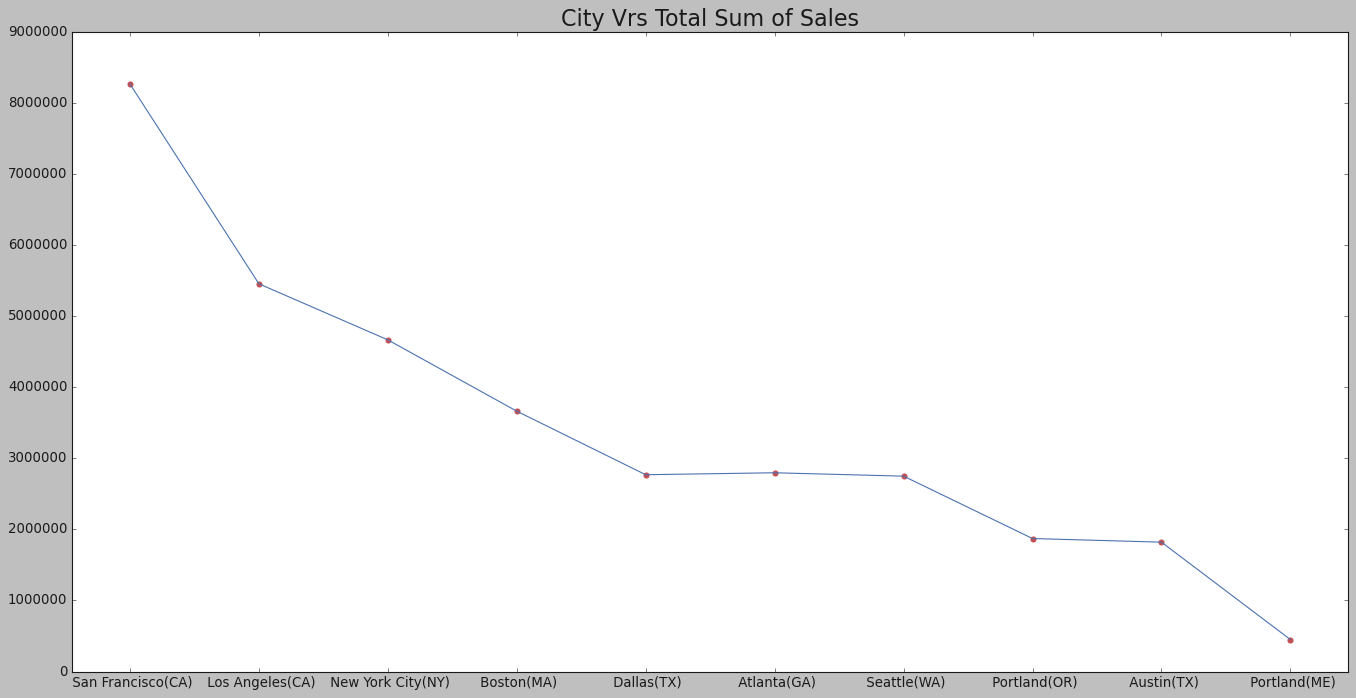

In [121]:
names = stockData3BestCity['City']
values = stockData3BestCity['Sales']
plt.style.use('classic')
plt.figure(figsize=(70, 10))

plt.subplot(131)
##plt.bar(names, values, color='b')
##plt.subplot(132)
plt.title('City Vrs Total Sum of Sales', fontsize=20)
plt.scatter(names, values, color='r')
##plt.subplot(133)
plt.plot(names, values)

plt.show()

MatplotLib and SK Learn, another popular and most widely used Python Visualization and Modeling Machien Learning in Data Science. The Plot above shows the distribution of Total Sum of Sales in each Segment or City. 

### Computing Sales and Quantity Sold By City and Month

In [54]:
## Total Sum of sales in Quantity and sales by States in each Month from Jan to Dec.
pd.set_option("display.max_rows", None, "display.max_columns", None)
stockData3BestMonth = pd.DataFrame(stockData3.groupby(["City", "Month"], as_index = False).sum())
stockData3BestMonth.head()

,City,Month,QuantityOrdered,PriceEach,Sales
0,Atlanta(GA),1,876,148523.69,149159.54
1,Atlanta(GA),10,1793,304508.46,306293.01
2,Atlanta(GA),11,1568,273143.85,275338.70
3,Atlanta(GA),12,2225,359097.06,360899.26
4,Atlanta(GA),2,1042,175851.81,176470.30


In [52]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
stockData3BestMonth = stockData3BestMonth.sort_values(["Sales","QuantityOrdered"], ascending = False)
stockData3BestMonth.head()

,City,Month,QuantityOrdered,PriceEach,Sales
99,San Francisco(CA),12,6787,1100501.11,1106601.27
97,San Francisco(CA),10,5310,861937.47,866700.98
102,San Francisco(CA),4,4975,805693.57,812426.19
103,San Francisco(CA),5,4443,772384.31,776679.49
98,San Francisco(CA),11,4840,760902.41,764979.29


In [53]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
stockData3BestMonth111 = stockData3BestMonth.sort_values(["Month", "Sales"], ascending = False)
stockData3BestMonth111

,City,Month,QuantityOrdered,PriceEach,Sales
107,San Francisco(CA),9,3083,460938.06,463595.72
59,Los Angeles(CA),9,2123,352525.82,354075.69
71,New York City(NY),9,1708,298981.09,300563.83
35,Boston(MA),9,1456,246591.73,248408.73
11,Atlanta(GA),9,1035,169923.85,171278.89
47,Dallas(TX),9,1053,163076.03,164212.86
119,Seattle(WA),9,1059,155312.63,156369.27
23,Austin(TX),9,763,105825.92,106483.70
95,Portland(OR),9,668,103159.92,103811.88
83,Portland(ME),9,161,28657.04,28759.56


In [54]:
stockData3BestMonth111.shape

(120, 5)

### Analysing and Comparing Sales In Each Month

In [87]:
fig = px.bar(stockData3BestMonth, x="City", y="Sales", title='Total Sales In Each Months By State', color="Month", width=1000, height=700,
               hover_data=['QuantityOrdered', 'PriceEach'])
#fig.update_traces(texttemplate='%{text:.2s}')
##fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
#with open("figure6.pdf", "wb") as f:
#    f.write(scope.transform(fig, format="pdf"))
#fig.write_html("file6.html")

In [89]:
## Scatter Plot Of Sum of Sales in every month by every City, This plot show all sum of order and Each price of a sale and Sum of sales in all 12 month 

fig = px.scatter(stockData3BestMonth, x="City", y="Sales", size = "Sales", color="Month", title='Total Sales In Each Months By State',  
                 hover_data=['QuantityOrdered', 'PriceEach'], size_max=40,  )
fig.update_traces(texttemplate='%{text:.2s}')
##fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
#with open("figure5.pdf", "wb") as f:
#    f.write(scope.transform(fig, format="pdf"))
fig.write_html("file5.png")

A bubble plot with an interactive Plotly Library in Python to Visualized our distribution of total Sales anad quantity order by each City and each month. From a statistics point of view and a mere observation December was our booming market and sales retunrs and this could be a factor of Christmas which likely, 
every producer is likely to earn more income. Top manager can use this period a source of comperitive advantage so as to target customers of specific months and 
its effects on our products ad service so as to creat, gain and maintain competitive advantage  by creating a unique and a core resiources and compitencies in the 
form of promotions and advertisments. 

### Analysing and Ploting Quantity Sold By Cities 

In [90]:
x = stockData3BestMonth['Month']
y = stockData3BestMonth['Sales']
z = np.random.rand(40)
colors = np.random.rand(40) 

<BarContainer object of 120 artists>

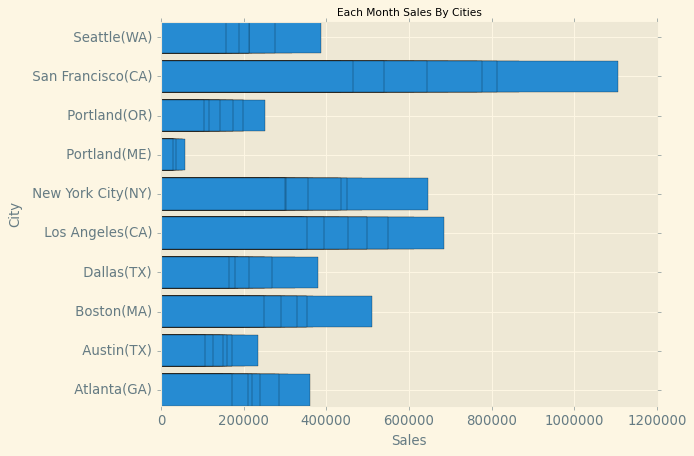

<Figure size 7200x1600 with 0 Axes>

In [91]:
data = ('stockData3BestMonth')

group_data = stockData3BestMonth['Sales']
group_names = stockData3BestMonth['City']
#group_mean = np.mean(group_data)
fig, ax = plt.subplots()
plt.style.use('seaborn-paper')
labels = ax.get_xticklabels()
ax.set(xlabel='Sales', ylabel='City',title='Each Month Sales By Cities')
plt.figure(figsize=(90, 20))
ax.barh(group_names, group_data)

Since there are different ways of Visualizing they I presentesd the Total Sales by each City into a different data Visulization form to have the best explanation
and a better understanding of the bout put for our Data. Above is a Bar plot of Total Sum of sales by each City in our Market segment. 

In [92]:
## Top sales Made in all month from the highiest to the lowerst 
 
##stockData3BestMonthsort = stockData3BestMonth.sort_values(["QuantityOrdered"], ascending = False)
##stockData3BestMonthsort.head(10)

### Analysing Total, Average, Maximum and Minimum Sales By Cities In Each Month

In [93]:
## Grouping All state and Mounth How much they purchase ou product by every  month

pd.set_option("display.max_rows", None, "display.max_columns", None)
stockDataAllMonthGropued = stockData3.groupby(['City','Month'], as_index = True).agg({'Sales':['sum','mean','max','min']}).round(2)
stockDataAllMonthGropued

Sales                       
                                 sum    mean      max   min
City               Month                                   
 Atlanta(GA)       1       149159.54  190.01  1700.00  2.99
                   10      306293.01  191.19  1700.00  2.99
                   11      275338.70  194.72  1700.00  2.99
                   12      360899.26  181.45  1700.00  2.99
                   2       176470.30  188.54  1700.00  2.99
                   3       231905.38  186.27  1700.00  2.99
                   4       284448.91  193.24  1700.00  2.99
                   5       238853.99  179.72  1700.00  2.99
                   6       219816.47  198.57  1700.00  2.99
                   7       211766.47  184.79  1700.00  2.99
                   8       169267.66  179.88  1700.00  2.99
                   9       171278.89  187.19  1700.00  2.99
 Austin(TX)        1        88087.06  166.52  1700.00  2.99
                   10      203196.12  186.08  1700.00  2.99
                   11      171286.47  197.11  1700.00  2.99
                   12      233777.09  173.43  1700.00  2.99
                   2       108787.40  174.06  1700.00  2.99
                   3       154549.27  183.77  1700.00  2.99
                   4       172683.59  177.48  1700.00  2.99
                   5       160635.22  191.69  1700.00  2.99
                   6       144057.29  201.48  1700.00  2.99
                   7       150324.93  197.02  1700.00  2.99
                   8       125713.61  193.70  1700.00  2.99
                   9       106483.70  160.61  1700.00  2.99
 Boston(MA)        1       201088.49  191.33  1700.00  2.99
                   10      367036.39  168.75  1999.98  2.99
                   11      351546.02  183.19  1700.00  2.99
                   12      509599.16  189.09  1700.00  2.99
                   2       214808.36  171.16  1700.00  2.99
                   3       301023.81  182.99  1700.00  2.99
                   4       353807.11  184.56  1700.00  2.99
                   5       328803.65  182.06  3400.00  2.99
                   6       254747.89  183.27  1700.00  2.99
                   7       291497.14  187.70  1700.00  2.99
                   8       239275.26  192.34  1700.00  2.99
                   9       248408.73  193.46  1700.00  2.99
 Dallas(TX)        1       143462.51  182.99  1700.00  2.99
                   10      323135.60  197.15  1700.00  2.99
                   11      248609.56  181.73  1700.00  2.99
                   12      380718.85  189.70  1700.00  2.99
                   2       186667.99  189.70  1700.00  2.99
                   3       222376.68  185.16  1700.00  2.99
                   4       251360.48  186.33  1700.00  2.99
                   5       268456.49  188.92  1700.00  2.99
                   6       186885.75  175.81  1700.00  2.99
                   7       212325.17  192.67  1700.00  2.99
                   8       179763.46  185.71  1700.00  2.99
                   9       164212.86  175.82  1700.00  2.99
 Los Angeles(CA)   1       288601.90  188.75  1700.00  2.99
                   10      612453.25  185.82  1700.00  2.99
                   11      499690.79  181.97  1700.00  2.99
                   12      684044.84  175.44  1700.00  2.99
                   2       342061.66  180.03  1700.00  2.99
                   3       429929.37  175.05  1700.00  2.99
                   4       550264.02  181.91  1700.00  2.99
                   5       499689.21  194.58  1700.00  2.99
                   6       451531.93  204.96  1700.00  2.99
                   7       394334.64  176.83  1700.00  2.99
                   8       345893.50  184.87  1700.00  2.99
                   9       354075.69  188.14  1700.00  2.99
 New York City(NY) 1       260591.29  198.47  1999.98  2.99
                   10      486954.41  183.96  1700.00  2.99
                   11      428180.32  181.82  1700.00  2.99
                   12      646770.83  190.11  1700.00  2.99
           

In [94]:
stockDataAllMonthGropuedSave = pd.DataFrame(stockDataAllMonthGropued)
stockDataAllMonthGropuedSave

Sales                       
                                 sum    mean      max   min
City               Month                                   
 Atlanta(GA)       1       149159.54  190.01  1700.00  2.99
                   10      306293.01  191.19  1700.00  2.99
                   11      275338.70  194.72  1700.00  2.99
                   12      360899.26  181.45  1700.00  2.99
                   2       176470.30  188.54  1700.00  2.99
                   3       231905.38  186.27  1700.00  2.99
                   4       284448.91  193.24  1700.00  2.99
                   5       238853.99  179.72  1700.00  2.99
                   6       219816.47  198.57  1700.00  2.99
                   7       211766.47  184.79  1700.00  2.99
                   8       169267.66  179.88  1700.00  2.99
                   9       171278.89  187.19  1700.00  2.99
 Austin(TX)        1        88087.06  166.52  1700.00  2.99
                   10      203196.12  186.08  1700.00  2.99
                   11      171286.47  197.11  1700.00  2.99
                   12      233777.09  173.43  1700.00  2.99
                   2       108787.40  174.06  1700.00  2.99
                   3       154549.27  183.77  1700.00  2.99
                   4       172683.59  177.48  1700.00  2.99
                   5       160635.22  191.69  1700.00  2.99
                   6       144057.29  201.48  1700.00  2.99
                   7       150324.93  197.02  1700.00  2.99
                   8       125713.61  193.70  1700.00  2.99
                   9       106483.70  160.61  1700.00  2.99
 Boston(MA)        1       201088.49  191.33  1700.00  2.99
                   10      367036.39  168.75  1999.98  2.99
                   11      351546.02  183.19  1700.00  2.99
                   12      509599.16  189.09  1700.00  2.99
                   2       214808.36  171.16  1700.00  2.99
                   3       301023.81  182.99  1700.00  2.99
                   4       353807.11  184.56  1700.00  2.99
                   5       328803.65  182.06  3400.00  2.99
                   6       254747.89  183.27  1700.00  2.99
                   7       291497.14  187.70  1700.00  2.99
                   8       239275.26  192.34  1700.00  2.99
                   9       248408.73  193.46  1700.00  2.99
 Dallas(TX)        1       143462.51  182.99  1700.00  2.99
                   10      323135.60  197.15  1700.00  2.99
                   11      248609.56  181.73  1700.00  2.99
                   12      380718.85  189.70  1700.00  2.99
                   2       186667.99  189.70  1700.00  2.99
                   3       222376.68  185.16  1700.00  2.99
                   4       251360.48  186.33  1700.00  2.99
                   5       268456.49  188.92  1700.00  2.99
                   6       186885.75  175.81  1700.00  2.99
                   7       212325.17  192.67  1700.00  2.99
                   8       179763.46  185.71  1700.00  2.99
                   9       164212.86  175.82  1700.00  2.99
 Los Angeles(CA)   1       288601.90  188.75  1700.00  2.99
                   10      612453.25  185.82  1700.00  2.99
                   11      499690.79  181.97  1700.00  2.99
                   12      684044.84  175.44  1700.00  2.99
                   2       342061.66  180.03  1700.00  2.99
                   3       429929.37  175.05  1700.00  2.99
                   4       550264.02  181.91  1700.00  2.99
                   5       499689.21  194.58  1700.00  2.99
                   6       451531.93  204.96  1700.00  2.99
                   7       394334.64  176.83  1700.00  2.99
                   8       345893.50  184.87  1700.00  2.99
                   9       354075.69  188.14  1700.00  2.99
 New York City(NY) 1       260591.29  198.47  1999.98  2.99
                   10      486954.41  183.96  1700.00  2.99
                   11      428180.32  181.82  1700.00  2.99
                   12      646770.83  190.11  1700.00  2.99
           

In [95]:
## stockDataAllMonthGropuedSave.to_csv('stockDataAllMonthGropuedSave3.csv')

The results of the distribution table tell managers about a descriptive Statistics of how each City within our Market segment performed in each month as previous Analysis but this time we need to understand other statistics such as "Mean", that is the average sum of sales or the average sales per month. As a Company Junior Analyst, I will need to put more interpretation on this result to be able to communicate properly to manager and all stakeholders of the company. 
First, the Column "City" returns all Cities in our Marketing segment, Second, the column "Month" is the particular month in which sales was sum up together to arrive at an actual sum of total sales in that particular Month. Third, the Column "Sum", this is the Total summation of all Purchases that is 
("Total Quantity of Order") * ("Price Each"). Again, "Mean", that is the average sum of sales or the average sales per month, the Column "Max", this is the Maximum price of an Item purchased with the month and last, "Min" which refers to the Minimum item price ordered in that particular Month.  From this observation, we are certain and sure that, the minimum item price for our product purchased by our customers was $ 2.99 and the Maximum price of our products is $ 1700.00. In a Decision support System, Strategic Managers can evaluate this performance on Budgetary control, where management tool is a key element to set realistic performance target and then monitor subsequent results base on City Average and total sales per month to see whether or not our business is on the right course and to be able to provide aa definite goal and objectives that serves as benchmark to evaluate performance.  

### Analysing Total, Average, Count, Maximum and Minimum Sales on Items by States in Month 

In [96]:
## Per Items Bought in individuals in Each Month  

pd.set_option("display.max_rows", None, "display.max_columns", None)
stockDataAllMonthGropued = stockData3.groupby(['City','Month', 'Product'], as_index = True).agg({'Sales':['sum','mean','count','max','min']}).round(0)
stockDataAllMonthGropued

Sales                \
                                                          sum    mean count   
City               Month Product                                              
 Atlanta(GA)       1     20in Monitor                  1650.0   118.0    14   
                         27in 4K Gaming Monitor        7410.0   390.0    19   
                         27in FHD Monitor              4650.0   150.0    31   
                         34in Ultrawide Monitor        8360.0   380.0    22   
                         AA Batteries (4-pack)          396.0     5.0    79   
                         AAA Batteries (4-pack)         392.0     5.0    87   
                         Apple Airpods Headphones     10350.0   150.0    69   
                         Bose SoundSport Headphones    6199.0   100.0    62   
                         Flatscreen TV                 6600.0   300.0    22   
                         Google Phone                 14400.0   600.0    24   
                         LG Dryer                      3000.0   600.0     5   
                         LG Washing Machine            1200.0   600.0     2   
                         Lightning Charging Cable      1659.0    17.0    98   
                         Macbook Pro Laptop           25500.0  1700.0    15   
                         ThinkPad Laptop              28000.0  1000.0    28   
                         USB-C Charging Cable          1076.0    12.0    87   
                         Vareebadd Phone               2800.0   400.0     7   
                         Wired Headphones              1019.0    13.0    79   
                         iPhone                       24500.0   700.0    35   
                   10    20in Monitor                  3190.0   110.0    29   
                         27in 4K Gaming Monitor       23789.0   390.0    61   
                         27in FHD Monitor             10049.0   150.0    67   
                         34in Ultrawide Monitor       19759.0   387.0    51   
                         AA Batteries (4-pack)          837.0     5.0   164   
                         AAA Batteries (4-pack)         759.0     4.0   172   
                         Apple Airpods Headphones     20250.0   150.0   135   
                         Bose SoundSport Headphones   10899.0   103.0   106   
                         Flatscreen TV                15900.0   300.0    53   
                         Google Phone                 25800.0   600.0    43   
                         LG Dryer                      2400.0   600.0     4   
                         LG Washing Machine            1200.0   600.0     2   
                         Lightning Charging Cable      3050.0    16.0   190   
                         Macbook Pro Laptop           76500.0  1700.0    45   
                         ThinkPad Laptop              37000.0  1000.0    37   
                         USB-C Charging Cable          2928.0    13.0   223   
                         Vareebadd Phone               6000.0   400.0    15   
                         Wired Headphones              1882.0    13.0   142   
                         iPhone                       44100.0   700.0    63   
                   11    20in Monitor                  3740.0   110.0    34   
                         27in 4K Gaming Monitor       19110.0   390.0    49   
                         27in FHD Monitor              8399.0   153.0    55   
                         34in Ultrawide Monitor       16720.0   389.0    43   
                         AA Batteries (4-pack)          753.0     5.0   146   
                         AAA Batteries (4-pack)         649.0     4.0   155   
                         Apple Airpods Headphones     16050.0   150.0   107   
                         Bose SoundSport Headphones    9899.0   101.0    98   
                         Flatscreen TV                 9900.0   300.0    33   
                         Google Phone                 26400.0   600.0    44   
                         LG

In [97]:
stockDataAllMonthGropued_New333 = pd.DataFrame(stockDataAllMonthGropued)
stockDataAllMonthGropued_New333

Sales                \
                                                          sum    mean count   
City               Month Product                                              
 Atlanta(GA)       1     20in Monitor                  1650.0   118.0    14   
                         27in 4K Gaming Monitor        7410.0   390.0    19   
                         27in FHD Monitor              4650.0   150.0    31   
                         34in Ultrawide Monitor        8360.0   380.0    22   
                         AA Batteries (4-pack)          396.0     5.0    79   
                         AAA Batteries (4-pack)         392.0     5.0    87   
                         Apple Airpods Headphones     10350.0   150.0    69   
                         Bose SoundSport Headphones    6199.0   100.0    62   
                         Flatscreen TV                 6600.0   300.0    22   
                         Google Phone                 14400.0   600.0    24   
                         LG Dryer                      3000.0   600.0     5   
                         LG Washing Machine            1200.0   600.0     2   
                         Lightning Charging Cable      1659.0    17.0    98   
                         Macbook Pro Laptop           25500.0  1700.0    15   
                         ThinkPad Laptop              28000.0  1000.0    28   
                         USB-C Charging Cable          1076.0    12.0    87   
                         Vareebadd Phone               2800.0   400.0     7   
                         Wired Headphones              1019.0    13.0    79   
                         iPhone                       24500.0   700.0    35   
                   10    20in Monitor                  3190.0   110.0    29   
                         27in 4K Gaming Monitor       23789.0   390.0    61   
                         27in FHD Monitor             10049.0   150.0    67   
                         34in Ultrawide Monitor       19759.0   387.0    51   
                         AA Batteries (4-pack)          837.0     5.0   164   
                         AAA Batteries (4-pack)         759.0     4.0   172   
                         Apple Airpods Headphones     20250.0   150.0   135   
                         Bose SoundSport Headphones   10899.0   103.0   106   
                         Flatscreen TV                15900.0   300.0    53   
                         Google Phone                 25800.0   600.0    43   
                         LG Dryer                      2400.0   600.0     4   
                         LG Washing Machine            1200.0   600.0     2   
                         Lightning Charging Cable      3050.0    16.0   190   
                         Macbook Pro Laptop           76500.0  1700.0    45   
                         ThinkPad Laptop              37000.0  1000.0    37   
                         USB-C Charging Cable          2928.0    13.0   223   
                         Vareebadd Phone               6000.0   400.0    15   
                         Wired Headphones              1882.0    13.0   142   
                         iPhone                       44100.0   700.0    63   
                   11    20in Monitor                  3740.0   110.0    34   
                         27in 4K Gaming Monitor       19110.0   390.0    49   
                         27in FHD Monitor              8399.0   153.0    55   
                         34in Ultrawide Monitor       16720.0   389.0    43   
                         AA Batteries (4-pack)          753.0     5.0   146   
                         AAA Batteries (4-pack)         649.0     4.0   155   
                         Apple Airpods Headphones     16050.0   150.0   107   
                         Bose SoundSport Headphones    9899.0   101.0    98   
                         Flatscreen TV                 9900.0   300.0    33   
                         Google Phone                 26400.0   600.0    44   
                         LG

In [98]:
# stockDataAllMonthGropued_New333.to_csv('stockDataAllMonthGropuedSave44.csv')

In [99]:
## Maximun Quantity Order, Price Each and 

#pd.set_option("display.max_rows", None, "display.max_columns", None)
#stockData3BestCity3 = pd.DataFrame(stockData3.groupby(["City", "Month"], as_index = False).max())
#stockData3BestCity3

### Analysing Qunatity Sold in Months and Sorting in Ascending order 

In [100]:
## Total Sum of sales in Quantity and sales by States in each Month from Jan to Dec.

stockBestMonth222 = pd.DataFrame(stockData3.groupby(["Month"], as_index = False).sum()).round(2)
stockBestMonth222

,Month,QuantityOrdered,PriceEach,Sales
0,1,10903,1811768.38,1822256.73
1,10,22703,3715554.83,3736726.88
2,11,19798,3180600.68,3199603.20
3,12,28114,4588415.41,4613443.34
4,2,13449,2188884.72,2202022.42
5,3,17005,2791207.83,2807100.38
6,4,20558,3367671.02,3390670.24
7,5,18667,3135125.13,3152606.75
8,6,15253,2562025.61,2577802.26
9,7,16072,2632539.56,2647775.76


In [101]:
stockBestMonth222['Month'] = stockBestMonth222.Month.astype(int)

In [102]:
##
BestMonthStockNew =  stockBestMonth222.sort_values(["Month"], ascending = True)
BestMonthStockNew

,Month,QuantityOrdered,PriceEach,Sales
0,1,10903,1811768.38,1822256.73
4,2,13449,2188884.72,2202022.42
5,3,17005,2791207.83,2807100.38
6,4,20558,3367671.02,3390670.24
7,5,18667,3135125.13,3152606.75
8,6,15253,2562025.61,2577802.26
9,7,16072,2632539.56,2647775.76
10,8,13448,2230345.42,2244467.88
11,9,13109,2084992.09,2097560.13
1,10,22703,3715554.83,3736726.88


In [103]:
fig = px.line_3d(BestMonthStockNew, x="QuantityOrdered", y="Sales", z="Month", title= 'Sum of Sales and Quantity in all Month')
fig.show()


In [104]:
# BestMonthStockNew = px.data.gapminder()

fig = px.line(BestMonthStockNew, x="Month", y="Sales", title='Monthly Sales In 2019', hover_data=['QuantityOrdered', 'PriceEach'])
fig.update_traces(texttemplate='%{text:.2s}')
##fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
#with open("figure1.pdf", "wb") as f:
 #   f.write(scope.transform(fig, format="pdf"))
#fig.write_html("fileNEW.html")

In [105]:
fig = px.scatter(BestMonthStockNew, x="Month", y="Sales",  size="Sales", title = "Total Sales Vs Months", color="Month", hover_name="PriceEach",log_y= True,
                 log_x= "", size_max=60)
fig.show()

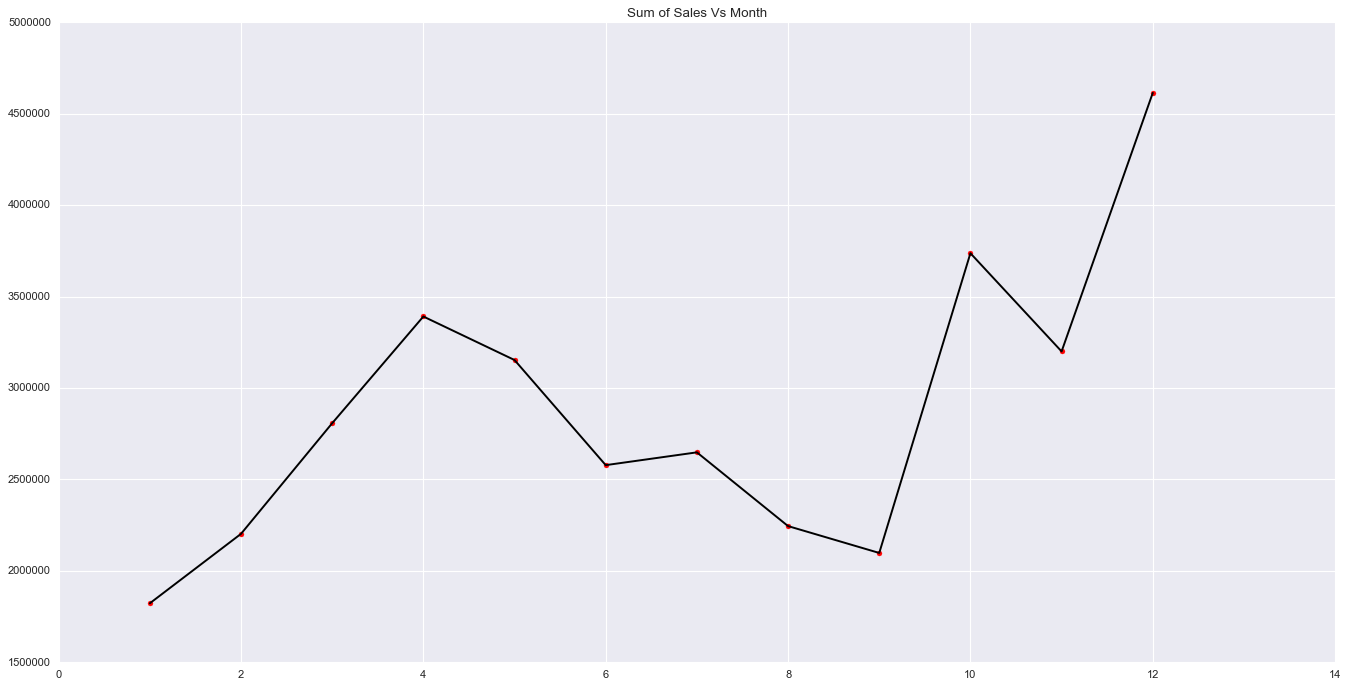

In [106]:
names = BestMonthStockNew['Month']
values = BestMonthStockNew['Sales']
plt.style.use('seaborn')
plt.figure(figsize=(70, 10))
##value2 = stockData3BestCity['PriceEach']
##plt.xlabel($$ e=mc^2 $$)
##plt.figure(figsize=(70, 10))

plt.subplot(131)
##plt.bar(names, values, color='b')
##plt.subplot(132)
plt.title('Sum of Sales Vs Month')
plt.scatter(names, values, color='r')
##plt.subplot(133)
plt.plot(names, values, color='black')



plt.show()

### Analysing Sale and Quntity By Days Of the week

In [108]:
stockDataWeek = pd.DataFrame(stockData3.groupby(["Daysinweek"], as_index = False).sum())
stockDataWeek

,Daysinweek,QuantityOrdered,PriceEach,Sales
0,Friday,29448,4830795.59,4855938.38
1,Monday,29899,4850763.70,4883326.72
2,Saturday,29769,4873105.48,4904357.01
3,Sunday,29778,4903226.77,4932169.66
4,Thursday,29662,4810040.26,4839465.16
5,Tuesday,30724,5061153.03,5087956.78
6,Wednesday,29799,4960045.85,4988822.26


In [109]:
stockDataWeek2 =  stockDataWeek.sort_values(["Sales", "QuantityOrdered"], ascending = False).round(2)
stockDataWeek2

,Daysinweek,QuantityOrdered,PriceEach,Sales
5,Tuesday,30724,5061153.03,5087956.78
6,Wednesday,29799,4960045.85,4988822.26
3,Sunday,29778,4903226.77,4932169.66
2,Saturday,29769,4873105.48,4904357.01
1,Monday,29899,4850763.70,4883326.72
0,Friday,29448,4830795.59,4855938.38
4,Thursday,29662,4810040.26,4839465.16


In [110]:
## stockBarplot1 = px.data.gapminder()
fig = px.bar(stockDataWeek2, y='Sales', x='Daysinweek', text='Sales',title='Sum of Sales and Quantity in all Days of Week', 
             hover_data=['PriceEach', 'QuantityOrdered', 'PriceEach'], color='Sales',)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
#with open("figure10.pdf", "wb") as f:
   # f.write(scope.transform(fig, format="pdf"))
#fig.write_html("file10.html")


In [111]:
fig = px.line(stockDataWeek2, x="Daysinweek", y="Sales", title='Sum Of Sales In Days Of The Week', hover_data=['QuantityOrdered', 'PriceEach'])
fig.update_traces(texttemplate='%{text:.2s}')
##fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
#with open("figure1.pdf", "wb") as f:
 #   f.write(scope.transform(fig, format="pdf"))
#fig.write_html("fileNEW.html")

In [112]:
sns.set(rc ={'figure.figsize':(10.5, 5.0)})

<BarContainer object of 7 artists>

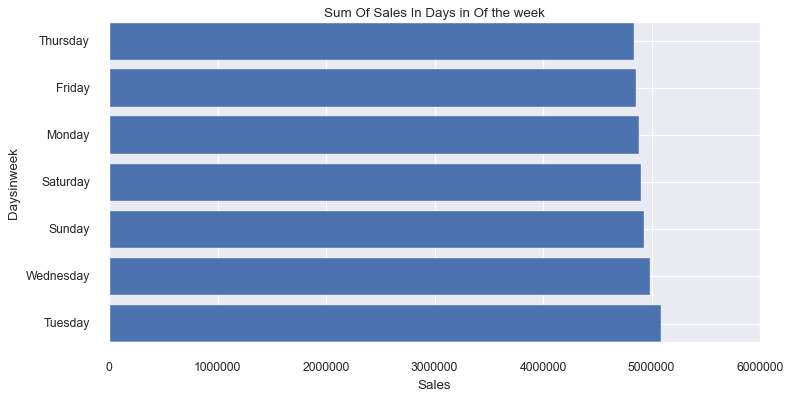

<Figure size 7200x1600 with 0 Axes>

In [113]:
data = ('stockDataWeek2')

group_data = stockDataWeek2['Sales']
group_names = stockDataWeek2['Daysinweek']
#group_mean = np.mean(group_data)
fig, ax = plt.subplots()
plt.style.use('seaborn')
labels = ax.get_xticklabels()
ax.set(xlabel='Sales', ylabel='Daysinweek',title='Sum Of Sales In Days in Of the week')
plt.figure(figsize=(90, 20))
ax.barh(group_names, group_data)

### Analysing Sales and Quntity Sold By Specific Items

In [114]:
stockBestProduct = pd.DataFrame(stockData3.groupby(["Product", "PriceEach"], as_index = False).sum())
stockBestProduct

,Product,PriceEach,QuantityOrdered,Sales
0,20in Monitor,109.99,4129,454148.71
1,27in 4K Gaming Monitor,389.99,6244,2435097.56
2,27in FHD Monitor,149.99,7550,1132424.50
3,34in Ultrawide Monitor,379.99,6199,2355558.01
4,AA Batteries (4-pack),3.84,27635,106118.40
5,AAA Batteries (4-pack),2.99,31017,92740.83
6,Apple Airpods Headphones,150.00,15661,2349150.00
7,Bose SoundSport Headphones,99.99,13457,1345565.43
8,Flatscreen TV,300.00,4819,1445700.00
9,Google Phone,600.00,5532,3319200.00


In [115]:
stockBestProduct = stockBestProduct.sort_values(["QuantityOrdered"], ascending = False)
stockBestProduct

,Product,PriceEach,QuantityOrdered,Sales
5,AAA Batteries (4-pack),2.99,31017,92740.83
4,AA Batteries (4-pack),3.84,27635,106118.40
15,USB-C Charging Cable,11.95,23975,286501.25
12,Lightning Charging Cable,14.95,23217,347094.15
17,Wired Headphones,11.99,20557,246478.43
6,Apple Airpods Headphones,150.00,15661,2349150.00
7,Bose SoundSport Headphones,99.99,13457,1345565.43
2,27in FHD Monitor,149.99,7550,1132424.50
18,iPhone,700.00,6849,4794300.00
1,27in 4K Gaming Monitor,389.99,6244,2435097.56


In [117]:
## stockBarplot1 = px.data.gapminder()
fig = px.bar(stockBestProduct, y='QuantityOrdered', x='Product', text='Sales',title='Sum of Sales and Quantity Of Product', 
             width=1100, height=700, hover_data=['PriceEach'], color='QuantityOrdered',)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
#with open("figure11.pdf", "wb") as f:
 #   f.write(scope.transform(fig, format="pdf"))
fig.write_html("file11.png")

In [118]:
sns.set(rc ={'figure.figsize':(8.7, 6.27)})

<BarContainer object of 19 artists>

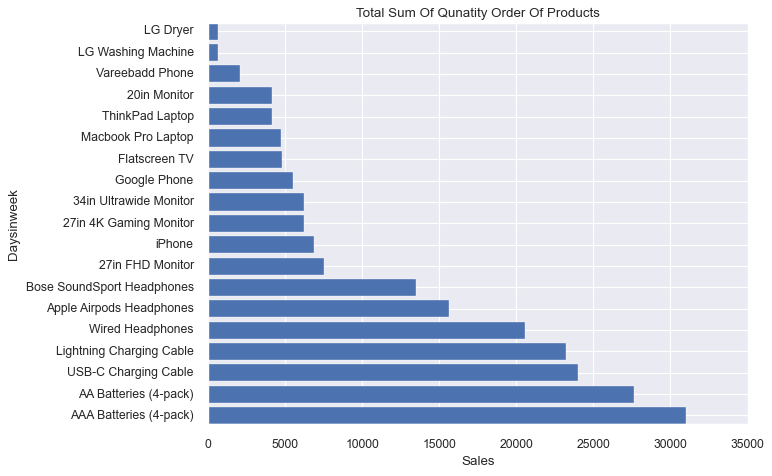

<Figure size 7200x4000 with 0 Axes>

In [119]:
data = ('stockBestProduct')

group_data = stockBestProduct['QuantityOrdered']
group_names = stockBestProduct['Product']
#group_mean = np.mean(group_data)
fig, ax = plt.subplots()
plt.style.use('seaborn')
labels = ax.get_xticklabels()
ax.set(xlabel='Sales', ylabel='Daysinweek',title='Total Sum Of Qunatity Order Of Products')
plt.figure(figsize=(90, 50))
ax.barh(group_names, group_data)

# Statistics

In [124]:
## Observing the Lower and the upper Values for HorsePower
def min_max_value(col):
    top = stockData3[col].idxmax()
    top_observ = pd.DataFrame(stockData3.loc[top])
    
    bottom = stockData3[col].idxmin()
    bottom_observ = pd.DataFrame (stockData3.loc[bottom])
    
    min_max_observ = pd.concat([top_observ,  bottom_observ], axis = 1)
    return min_max_observ
min_max_value('PriceEach')

,8,19
OrderID,176565.0,176575.0
Product,Macbook Pro Laptop,AAA Batteries (4-pack)
QuantityOrdered,1,1
PriceEach,1700,2.99
OrderDate,2019-04-24 10:38:00,2019-04-27 00:30:00
PurchaseAddress,"915 Willow St, San Francisco, CA 94016","433 Hill St, New York City, NY 10001"
Month,4,4
Sales,1700,2.99
City,San Francisco(CA),New York City(NY)
Daysinweek,Wednesday,Saturday


# Box Plot and Whiskers

Tukey's box plots (Robert McGill, John W. Tukey and Wayne A. Larsen: "The American Statis-tician" Vol. 32, No. 1, Feb., 1978, pp. 12-16)are statistical plots 
that provide useful informa-tion about the data distribution such as skewness. However, bar plots with error bars are still the common standard in most scientiﬁc
literature, and thus, the interpretation of box plots can be challenging for the unfamiliar reader. The ﬁgure below illustrates the diﬀerent visual features of a 
box plot. Violin plots are closely related to box plots but add useful information such as the distribution of the sample data (density trace).

Text(0.5, 1.0, 'Sales')

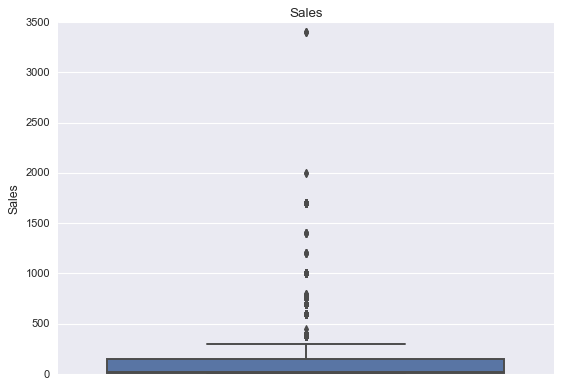

In [123]:
ax = sns.boxplot(y ='Sales', data = stockData3 )
plt.title('Sales')

Text(0.5, 1.0, 'PriceEach')

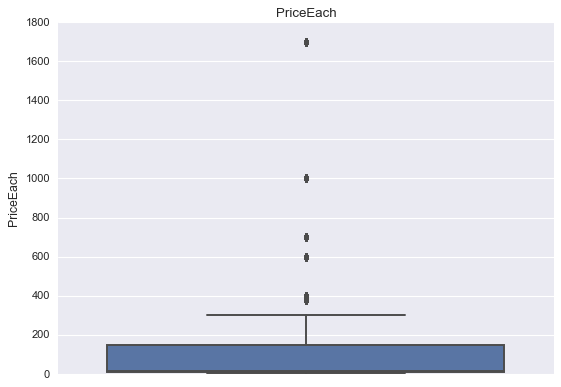

In [122]:
ax = sns.boxplot(y ='PriceEach', data = stockData3 )
plt.title('PriceEach')


Text(0.5, 1.0, 'QuantityOrdered Vs Sales')

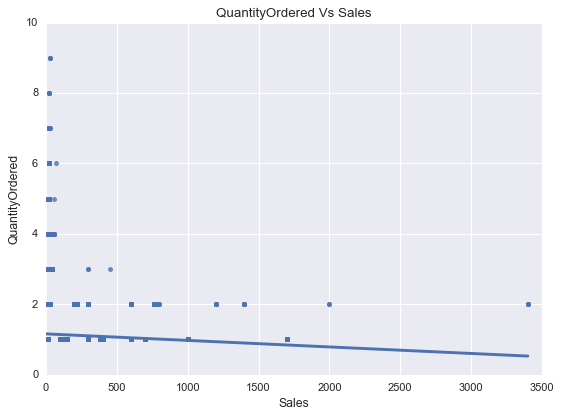

In [120]:
sns.regplot(x = 'Sales', y= 'QuantityOrdered',data=stockData3)
plt.title('QuantityOrdered Vs Sales')

## Correlation Using Python Pandas, Association and Causation

##  Data Correlation Method
Data correlation is a method that helps to predict one attribute from another attribute and is used as a basic quantity in many modeling techniques. 
If one feature increases, the correlation will be positive, so the other feature increases as well and negative if one feature increases there will be a
reduction in another. If there is no relation between any two attributes then it is said to be no correlation. If there is a linear relationship between 
the constant variables then the Pearson correlation coefficient is used. If there is a non-linear relation between the constant variables
then the Spearman correlation coefficient is used. Since the considered data set is linear so the Pearson correlation coefficient is used for the selection of 
features in this study. This correlation for all the attributes is shown in figure 3.4. To improve the efficiency of the Machine Learning model, the attributes 
that have negative correlations were removed. It is a statistic measuring the linear correlation of two variables X and Y. It has a value between +1 and 1,
where 1 is a linear positive correlation, 0 is not a linear correlation and 1 is a linear negative correlation. The motivation for considering the correlation is when people know a score on one measure, they can make a prediction of another measure that is highly related to it more accurate. The more accurate the prediction, the stronger the relationship between the variables.

In [108]:
from scipy.stats.stats import pearsonr
from sympy import symbols, Eq, solve

In [109]:
stockData3New = stockData3

In [110]:
correlation = (stockData3New.corr())

In [112]:
round(correlation, 3)
correlation
print (correlation)

                 QuantityOrdered  PriceEach     Sales
QuantityOrdered         1.000000  -0.148272 -0.139417
PriceEach              -0.148272   1.000000  0.999203
Sales                  -0.139417   0.999203  1.000000


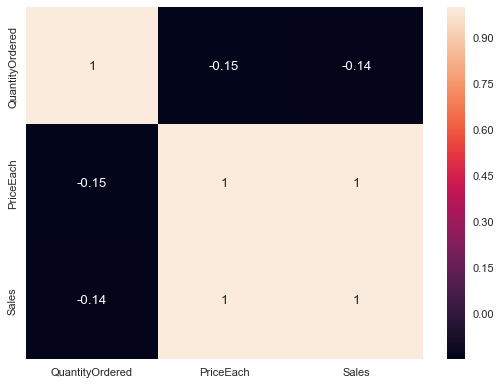

In [113]:
data = stockData3

df = pd.DataFrame(data,columns=['QuantityOrdered','PriceEach','Sales'])

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


Text(0.5, 1.0, 'PriceEach Vs Sales')

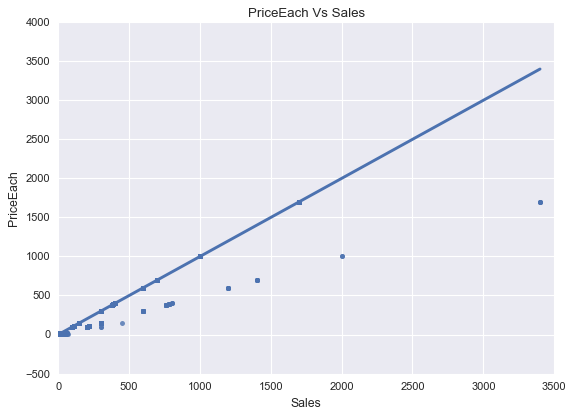

In [121]:
sns.regplot(x = 'Sales', y= 'PriceEach', data=stockData3 )
plt.title('PriceEach Vs Sales')


In [122]:
from matplotlib import cbook

C:\Users\JeroRich\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='PriceEach', ylabel='Density'>

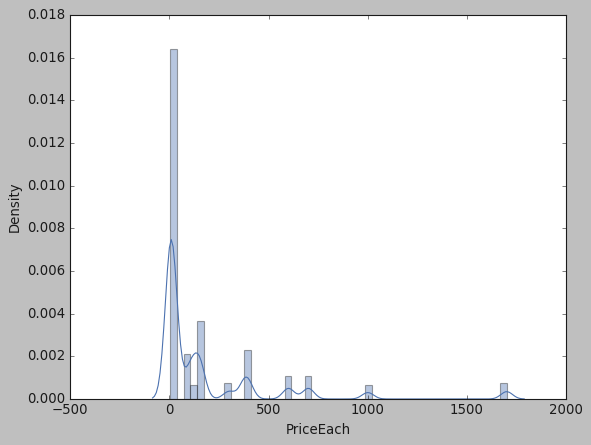

In [123]:
sns.distplot(stockData3["PriceEach"], kde = True)

The distribution plotstell us how our Unit price of our products are setup, from the plot we can see most of our products are priced between $ 2.99 and $ 540.00